In [12]:
import pandas as pd



In [13]:
mustakil_ev_verisi = pd.read_csv("metrekare_fiyat.csv")


In [16]:
import matplotlib.pyplot as plt

mustakil_ev_verisi['fiyat'] = mustakil_ev_verisi['fiyat'] / 100000
mustakil_ev_verisi['fiyat']


0      74.5
1     400.0
2      55.0
3     135.0
4      93.5
      ...  
64    115.0
65    300.0
66    280.0
67    280.0
68    210.0
Name: fiyat, Length: 69, dtype: float64

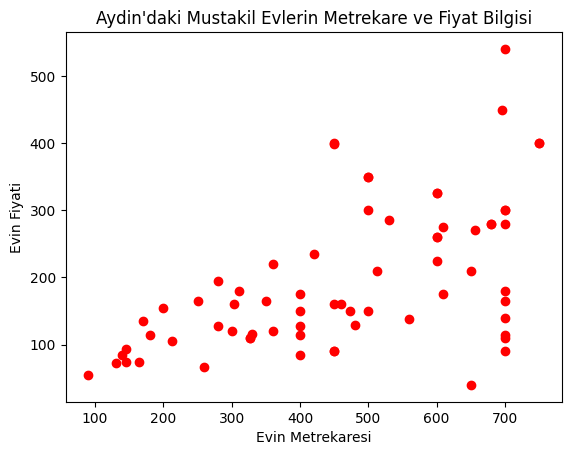

In [17]:

plt.scatter(mustakil_ev_verisi['metrekare'], mustakil_ev_verisi['fiyat'], color="red")
plt.xlabel("Evin Metrekaresi")
plt.ylabel("Evin Fiyati")
plt.title("Aydin'daki Mustakil Evlerin Metrekare ve Fiyat Bilgisi")
plt.ticklabel_format(style='plain', axis='y')
plt.show()

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
x = mustakil_ev_verisi['metrekare'].values.reshape(-1, 1)
y = mustakil_ev_verisi['fiyat']


model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [26]:
model.coef_, model.intercept_

(array([0.32077948]), np.float64(46.17554113234783))

In [21]:
predict = model.predict([[500]])
predict


array([206.56528329])

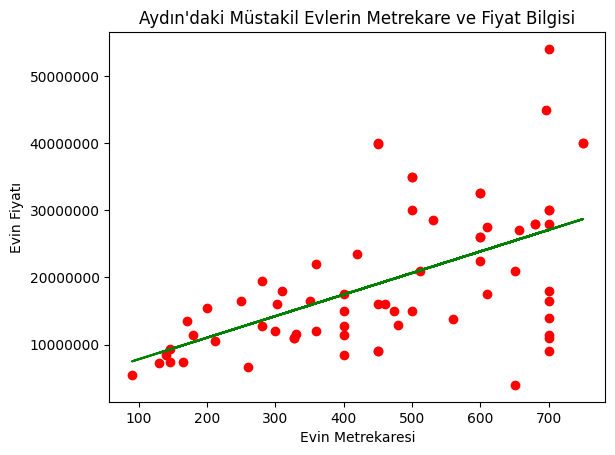

In [91]:


predictions = model.predict(x)

plt.scatter(mustakil_ev_verisi['metrekare'], mustakil_ev_verisi['fiyat'], color="red")
plt.plot(mustakil_ev_verisi['metrekare'], predictions, color="green")
plt.xlabel("Evin Metrekaresi")
plt.ylabel("Evin Fiyati")
plt.ticklabel_format(style='plain', axis='y')
plt.title("Aydin'daki Müstakil Evlerin Metrekare ve Fiyat Bilgisi")
plt.show()


In [22]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(mustakil_ev_verisi[['metrekare', 'fiyat']])  
mustakil_ev_verisi['cluster'] = kmeans.labels_
mustakil_ev_verisi

,metrekare,fiyat,cluster
0,165,74.5,2
1,750,400.0,0
2,90,55.0,2
3,170,135.0,2
4,145,93.5,2
...,...,...,...
64,700,115.0,0
65,700,300.0,0
66,700,280.0,0
67,680,280.0,0


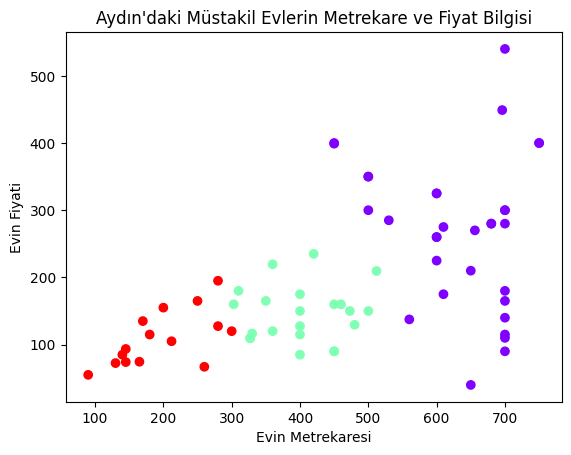

In [23]:
import matplotlib.pyplot as plt

plt.scatter(mustakil_ev_verisi['metrekare'], mustakil_ev_verisi['fiyat'], c=mustakil_ev_verisi['cluster'], cmap='rainbow')
plt.xlabel("Evin Metrekaresi")
plt.ylabel("Evin Fiyati")
plt.title("Aydın'daki Müstakil Evlerin Metrekare ve Fiyat Bilgisi")
plt.show()

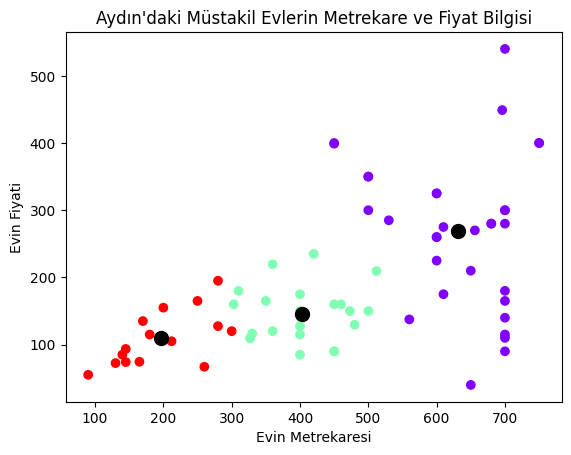

In [25]:
import matplotlib.pyplot as plt

plt.scatter(mustakil_ev_verisi['metrekare'], mustakil_ev_verisi['fiyat'], c=mustakil_ev_verisi['cluster'], cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, color='black')
plt.xlabel("Evin Metrekaresi")
plt.ylabel("Evin Fiyati")
plt.title("Aydin'daki Müstakil Evlerin Metrekare ve Fiyat Bilgisi")
plt.show()